<a href="https://colab.research.google.com/github/ryuhyunwoo1/classDeepLearning/blob/main/practices/practices_week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Week 7 : Working with Keras (A deep dive)

## Different ways to build Keras model

The design of Keras API: make it easy to get started, yet make it possible to handle high-complexity use cases

Simple use cases should be easy and approachable, and arbitrarily advanced workflows should be possible



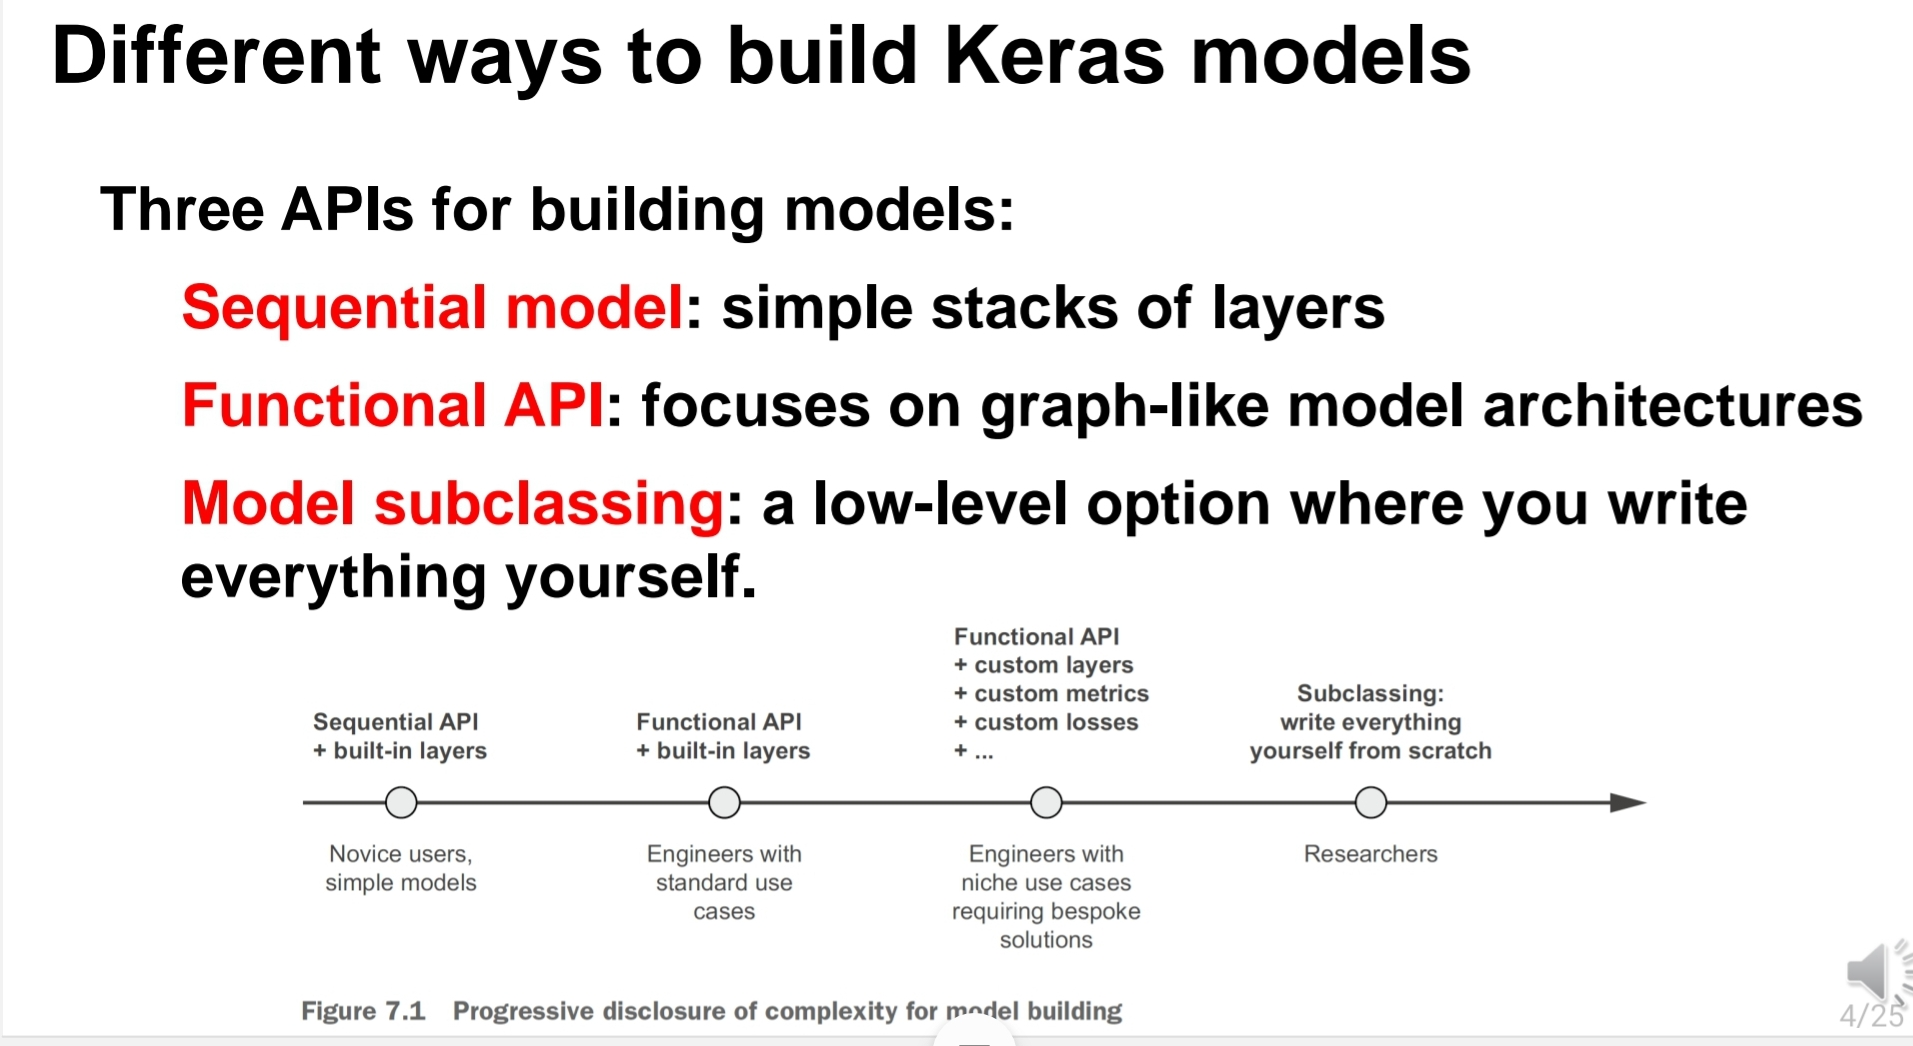

### The Sequential class

In [1]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation = "relu"),
    layers.Dense(10, activation = "softmax")
])

In [2]:
model = keras.Sequential()
model.add(layers.Dense(64, activation = "relu"))
model.add(layers.Dense(10, activation = "softmax"))

In [3]:
model.build(input_shape = (None, 3))
model.weights

[<tf.Variable 'dense_2/kernel:0' shape=(3, 64) dtype=float32, numpy=
 array([[-0.13301188, -0.13656996, -0.28951937,  0.2371136 , -0.17201401,
         -0.2111533 , -0.26975036, -0.11787024,  0.04018387, -0.1926823 ,
          0.1586692 , -0.25344434,  0.24663973, -0.20845671, -0.11785211,
         -0.01806888,  0.14541861, -0.16582014,  0.0865958 , -0.14343752,
          0.1690656 ,  0.13149175,  0.2723452 ,  0.15256006, -0.23484755,
         -0.04363972,  0.2410953 , -0.08578402, -0.00881234, -0.2750728 ,
          0.21896535,  0.00868264, -0.16348565, -0.01227853, -0.10635319,
          0.2857852 , -0.09746672, -0.2569467 ,  0.01611951, -0.0723677 ,
          0.09250787,  0.12775749, -0.13752924, -0.02374941,  0.24406832,
          0.09119543,  0.12817764,  0.2658381 , -0.20083374, -0.05025485,
         -0.08201872,  0.15113753,  0.20526725,  0.01355621,  0.24982464,
         -0.10369529, -0.07193854,  0.17833817, -0.24136451,  0.19038376,
          0.19680923, -0.13251737, -0.16257

In [4]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                256       
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 906 (3.54 KB)
Trainable params: 906 (3.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [5]:
model = keras.Sequential(name = "モデル")
model.add(layers.Dense(64, activation = "relu", name = "relu"))
model.add(layers.Dense(10, activation = "softmax", name = "softmax"))
model.build((None, 3))
model.summary()

Model: "モデル"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 relu (Dense)                (None, 64)                256       
                                                                 
 softmax (Dense)             (None, 10)                650       
                                                                 
Total params: 906 (3.54 KB)
Trainable params: 906 (3.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
model = keras.Sequential(name = "モデル")
model.add(layers.Dense(64, activation = "relu", name = "relu"))
model.build((None, 3))
model.summary()

Model: "モデル"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 relu (Dense)                (None, 64)                256       
                                                                 
Total params: 256 (1.00 KB)
Trainable params: 256 (1.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
model.add(layers.Dense(10, activation = "softmax", name = "softmax"))
model.summary()

Model: "モデル"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 relu (Dense)                (None, 64)                256       
                                                                 
 softmax (Dense)             (None, 10)                650       
                                                                 
Total params: 906 (3.54 KB)
Trainable params: 906 (3.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### The Functional API

In [8]:
inputs = keras.Input(shape = (3, ), name = "インプット")
features = layers.Dense(64, activation = "relu")(inputs)
outputs = layers.Dense(10, activation = "softmax")(features)
model = keras.Model(inputs = inputs, outputs = outputs)

In [9]:
inputs.shape

TensorShape([None, 3])

In [10]:
inputs.dtype

tf.float32

In [11]:
## モデル構成
vocabulary_size = 10000
num_tags = 100
num_departments = 4

title = keras.Input(shape = (vocabulary_size, ), name = "タイトル")
text_body = keras.Input(shape = (vocabulary_size, ), name = "テキストボディー")
tags = keras.Input(shape = (num_tags, ), name = "タグ")

features = layers.Concatenate()([title, text_body, tags])
features = layers.Dense(64, activation = "relu")(features)

priority = layers.Dense(1, activation = "sigmoid", name = "PRIORITY")(features)
department = layers.Dense(num_departments, activation = "softmax", name = "DEPARTMENT")(features)

model = keras.Model(inputs = [title, text_body, tags],
                    outputs = [priority, department])

In [13]:
## データを準備し、コンパイルします
import numpy as np

num_samples = 1280

title_data = np.random.randint(0, 2, size = (num_samples, vocabulary_size))
text_body_data = np.random.randint(0, 2, size = (num_samples, vocabulary_size))
tags_data = np.random.randint(0, 2, size = (num_samples, num_tags))

priority_data = np.random.random(size = (num_samples, 1))
department_data = np.random.randint(0, 2, size = (num_samples, num_departments))

model.compile(optimizer = "rmsprop",
              loss = ["mean_squared_error", "categorical_crossentropy"],
              metrics = [["mean_absolute_error"], ["accuracy"]])
model.fit([title_data, text_body_data, tags_data],
          [priority_data, department_data],
          epochs = 1)
model.evaluate([title_data, text_body_data, tags_data],
               [priority_data, department_data])
priority_preds, department_preds = model.predict([title_data, text_body_data, tags_data])

40/40 [==============================] - 0s 4ms/step


In [15]:
model.compile(optimizer = "rmsprop",
              loss = {"PRIORITY" : "mean_squared_error", "DEPARTMENT" : "categorical_crossentropy"},
              metrics = {"PRIORITY" : ["mean_absolute_error"], "DEPARTMENT" : ["accuracy"]})
model.fit({"タイトル" : title_data, "テキストボディー" : text_body_data, "タグ" : tags_data},
          {"PRIORITY" : priority_data, "DEPARTMENT" : department_data},
          epochs = 1)
model.evaluate({"タイトル" : title_data, "テキストボディー" : text_body_data, "タグ" : tags_data},
               {"PRIORITY" : priority_data, "DEPARTMENT" : department_data})
priority_preds, department_preds = model.predict({"タイトル" : title_data, "テキストボディー" : text_body_data, "タグ" : tags_data})

40/40 [==============================] - 0s 5ms/step


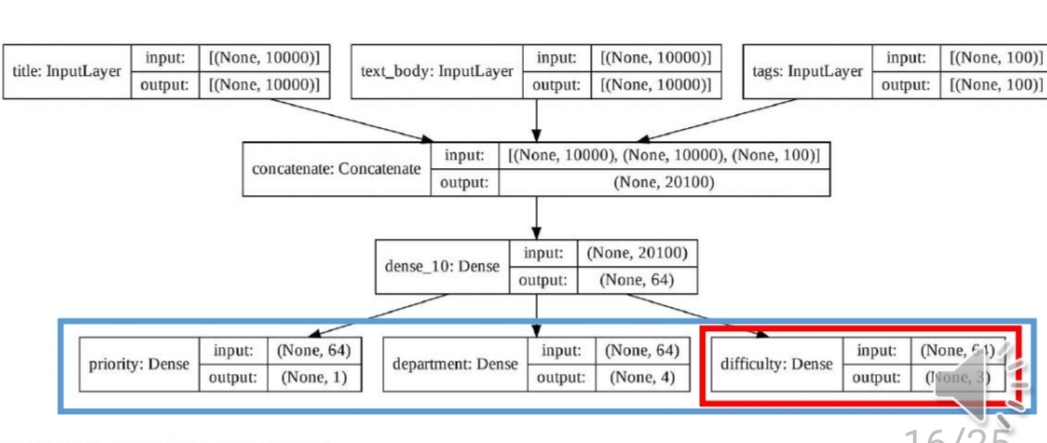

In [ ]:
features = model.layers[4].output
difficulty = layers.Dense(3, activation = "softmax", name = "difficulty")(features)

new_model = keras.Model(inputs = [title, text_body, tags],
                        outputs = [priority, department, difficulty])

### Model Subclassing

In [ ]:
class CustomerTicketModel(keras.Model):
  def __init__(self, num_departments):
    super().__init__()
    self.concat_layer = layers.Concatenate()
    self.mixing_layer = layers.Dense(64, activation = "relu")
    self.priority_scorer = layers.Dense(1, activation = "sigmoid")
    self.department_classifier = layers.Dense(num_departments, activation = "softmax")

  def call(self, inputs):
    title = inputs["タイトル"]
    text_body = inputs["テキストボディー"]
    tags = inputs["タグ"]

    features = self.concat_layer([title, text_body, tags])
    features = self.mixing_layer(features)
    priority = self.priority_scorer(features)
    department = self.department_classifier(features)
    return priority, department

In [ ]:
model = CustomerTicketModel(num_departments = 4)
priority, department = model({"タイトル" : title_data, "テキストボディー" : text_body_data, "タグ" : tags_data})

In [ ]:
model.compile(optimizer = "rmsprop",
              loss = ["mean_squared_error", "categorical_crossentropy"],
              metrics = [["mean_absolute_error"], ["accuracy"]])
model.fit({"タイトル" : title_data, "テキストボディー" : text_body_data, "タグ" : tags_data},
          [priority_data, department_data],
          epochs = 1)
model.evaluate({"タイトル" : title_data, "テキストボディー" : text_body_data, "タグ" : tags_data},
               [priority_data, department_data])
priority_preds, departments_preds = model.predict({"タイトル" : title_data,
                                                   "テキストボディー" : text_body_data,
                                                   "タグ" : tags_data})

In [ ]:
## Creating a Functional model that includes a subclassed model
class Classifier(keras.Model) :
  def __init__(self, num_classes = 2):
    super().__init__()
    if num_classes == 2:
      num_units = 1
      activation = "sigmoid"
    else:
      num_units = num_classes
      activation = "softmax"
    self.dense = layers.Dense(num_units, activation = activation)

  def call(self, inputs):
    return self.dense(inputs)

inputs = keras.Input(shape=(3,))
features = layers.Dense(64, activation = "relu")(inputs)
outputs = Classifier(num_classes = 10) (features)
model = keras.Model(inputs = inputs, outputs = outputs)

In [ ]:
# Creating a subclassed model that includes a Functional models
inputs = keras.Input(shape = (64, ))
outputs = layers.Dense(1, activation = "sigmoid")(inputs)
binary_classifier = keras.Model(inputs = inputs, outputs = outputs)

class MyModel(keras.Model):
  def __init__(self, num_classes = 2):
    super().__init__()
    self.dense = layers.Dense(64, activation = "relu")
    self.classifier = binary_classifier

  def call(self, inputs):
    features = self.dense(inputs)
    return self.classifier(features)

model = MyModel()

## Using built-in training and evaluation loops

In [ ]:
from tensorflow.keras.datasets import mnist

def get_mnist_model():
  inputs = keras.Input(shape = (28 * 28, ))
  features = layers.Dense(512, activation = "relu")(inputs)
  features = layers.Dropout(0.5)(features)
  outputs = layers.Dense(10, activation = "softmax")(features)
  model = keras.Model(inputs, outputs)
  return model

(images, labels), (test_images, test_labels) = mnist.load_data()
images = images.reshape((60000, 28*28)).astype("float32") / 255
test_images = test_images.reshape((10000, 28*28)).astype("float32") / 255
train_images, val_images = images[10000:], images[:10000]
train_labels, val_labels = labels[10000:], labels[:10000]

model = get_mnist_model()
model.compile(optimizer = "rmsprop", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])
model.fit(train_images, train_labels, epochs = 3, validation_data = (val_images, val_labels))
test_metrics = model.evaluate(test_images, test_labels)
predictions = model.predict(test_images)

## training and evaluation loops 練習

In [ ]:
import tensorflow as tf

class RootMeanSquaredError(keras.metrics.Metric):
  def __init__(self, name = "rmse", **kwargs):
    super().__init__(name = name, **kwargs)
    self.mse_sum = self.add_weight(name = "mse_sum", initializer = "zeros")
    self.total_samples = self.add_weight(
        name = "total_samples", initializer = "zeros", dtype = "int32")

  def update_state(self, y_true, y_pred, sample_weight = None):
    y_true = tf.one_hot(y_true, depth = tf.shape(y_pred)[1])
    mse = tf.reduce_sum(tf.square(y_true - y_pred))
    self.mse_sum.assign_add(mse)
    num_samples = tf.shape(y_pred)[0]
    self.total_samples.assign_add(num_samples)

  def result(self):
    return tf.sqrt(self.mse_sum / tf.cast(self.total_samples, tf.float32))

  def reset_state(self):
    self.mse_sum.assign(0.)
    self.total_samples.assign(0)

In [ ]:
model = get_mnist_model()
model.compile(optimizer = "rmsprop",
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy", RootMeanSquaredError()])
model.fit(train_images, train_labels,
          epochs = 3, validation_data = (val_images, val_labels))
test_metrics = model.evaluate(test_images, test_labels)

Epoch 1/3
1563/1563 [==============================] - 7s 4ms/step - loss: 0.2968 - accuracy: 0.9111 - rmse: 7.1762 - val_loss: 0.1454 - val_accuracy: 0.9591 - val_rmse: 7.3491
Epoch 2/3
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1617 - accuracy: 0.9541 - rmse: 7.3494 - val_loss: 0.1237 - val_accuracy: 0.9668 - val_rmse: 7.4053
Epoch 3/3
313/313 [==============================] - 1s 2ms/step - loss: 0.1044 - accuracy: 0.9691 - rmse: 7.4223
